In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

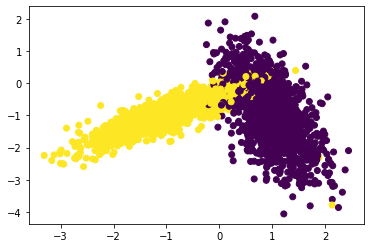

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [15]:
def RandomSearchCV(x_train, y_train,classifier, params, folds):
    trainscores =[]
    testscores = []
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        train_indices = list(range(len(x_train)))
        fold_indices = np.array_split(train_indices, folds)
        for i in range(0, folds): #for each number of times of a fold
            fold_test_index = fold_indices[i]
            fold_train_indices = list(set(list(range(1, len(train_indices)))) - set(fold_test_index))
            X_test = x_train[fold_test_index]
            Y_test =y_train[fold_test_index]
            X_train = x_train[fold_train_indices]
            Y_train = y_train[fold_train_indices]
            #print("Shape of X_train is", X_train.shape)
            #print("Shape of X_test is", X_test.shape)
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        #print("trainscores")
        testscores.append(np.mean(np.array(testscores_folds)))
        #print(testscores)
    return trainscores,testscores
            
            

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

The random k values in the given range is  {'n_neighbors': array([ 1,  9, 15, 24, 25, 27, 29, 36, 46, 49])}


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.38it/s]


The train accuracies are [1.0, 0.9608613856104554, 0.9589278389011135, 0.9567941855037674, 0.9575943188637727, 0.9573942655197706, 0.9577942788557712, 0.9580610122024406, 0.9579277188771087, 0.9581277055411083]
The test accuracies are [0.9296000000000001, 0.9529333333333333, 0.9540000000000001, 0.9535999999999999, 0.9541333333333334, 0.9538666666666668, 0.9550666666666667, 0.9556, 0.9561333333333334, 0.9558666666666666]


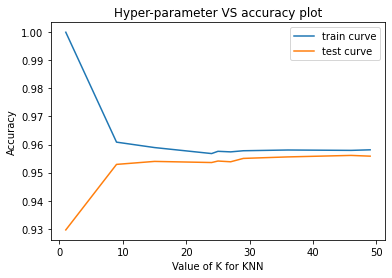

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
params_range = range(1,50)
params = np.sort(random.sample(params_range, 10)) #Gives an array of 10 random integers and sorts it
params = {'n_neighbors':params}
#print(params)

#params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
print("The random k values in the given range is ", params)
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
print("The train accuracies are", trainscores)
print("The test accuracies are", testscores)
plt.plot(params['n_neighbors'],trainscores, label='train curve')
plt.plot(params['n_neighbors'],testscores, label='test curve')
plt.xlabel('Value of K for KNN')
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [5]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
    

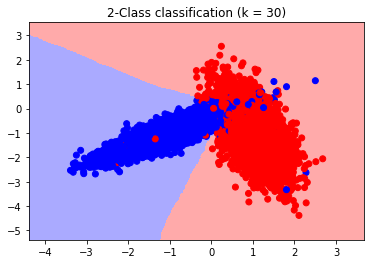

In [9]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 30)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

In [57]:
#COde to define how data is split
x_train = range(66)
folds = 5
#fold_size = int(len(x_train)/folds)
train_indices = list(range(len(x_train)))
#train_indices_for_folds = [train_indices[i:i+folds] for i in range (0, len(train_indices), fold_size)]
train_indices_for_folds = np.array_split(train_indices, folds)
train_indices_for_folds

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]),
 array([53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])]

In [35]:
params_range = (1,50)
params = list(np.sort(numpy.random.randint(params_range[0],params_range[1], size=10, dtype=int)))
print(params)
dic_params = dict()
dic_params = {'n_neighbors':params}
for pair in dic_params.items():
    print(pair)

#How to define parame
#params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
#for pair in params.items():
  #  print(pair)

[7, 11, 15, 21, 21, 31, 33, 38, 40, 43]
('n_neighbors', [7, 11, 15, 21, 21, 31, 33, 38, 40, 43])


In [12]:
import random
params = list(np.sort(random.sample(range(1,50), 10)))
params

[3, 10, 12, 17, 20, 21, 29, 34, 39, 48]